<a href="https://colab.research.google.com/github/lexyonjanlama/lexyonjanlama/blob/main/aviation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Project Setup**
> installing required libraries and importing packages for data handling,visualization, modeling and evalutaiton.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Loading and initial cleaning**
> loading aviation dataset into a pandas DataFrame and it's structure, columns and missing values.



In [3]:
#Load the dataset from a  URL
url = '/content/Airplane_Crashes_and_Fatalities_Since_1908.csv'
df = pd.read_csv(url)

#Preview the first few rows
df.head()


,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...




```
# This is formatted as code
```

**Checking dataset's size and missing values**

In [4]:
# Dataset shape (rows, columns)
print("Dataset shape:", df.shape)

# Column-wise missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Dataset shape: (5268, 14)

Missing values in each column:
index              0
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64


**Checking % of Missing Values and Dropping Columns**


In [5]:
# 📊 Calculate percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100

# Display columns with missing % sorted in descending order
missing_percent = missing_percent.sort_values(ascending=False)
print(" Missing Values (%):\n")
print(missing_percent)

# 📉 Drop columns with more than 50% missing data
cols_to_drop = missing_percent[missing_percent > 50].index
df.drop(columns=cols_to_drop, inplace=True)

print("\n Dropped columns (more than 50% missing):", list(cols_to_drop))
print(" New shape of dataset:", df.shape)


 Missing Values (%):

Flight #        79.707669
Time            42.122248
Route           32.403189
cn/In           23.310554
Summary          7.403189
Registration     6.359150
Type             0.512528
Aboard           0.417616
Ground           0.417616
Location         0.379651
Operator         0.341686
Fatalities       0.227790
index            0.000000
Date             0.000000
dtype: float64

 Dropped columns (more than 50% missing): ['Flight #']
 New shape of dataset: (5268, 13)


**Dropping Flight and checking datatype**

In [6]:
# Drop 'Flight #' only if it's still present
if 'Flight #' in df.columns:
    df.drop(columns=['Flight #'], inplace=True)

# Check data types of all columns
print("Data types:\n")
print(df.dtypes)

# Display summary information
print("\nDataset overview:\n")
df.info()


Data types:

index             int64
Date             object
Time             object
Location         object
Operator         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

Dataset overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         5268 non-null   int64  
 1   Date          5268 non-null   object 
 2   Time          3049 non-null   object 
 3   Location      5248 non-null   object 
 4   Operator      5250 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities   

###Convert Data Types (Date & Time)

Convert 'Date' to datetime format for time-based feature extraction, and handle missing 'Time' values.


In [7]:
#Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#Fill missing 'Time' values with a placeholder time (midnight)
df['Time'] = df['Time'].fillna('00:00')

#Display the first few rows to confirm changes
print(df[['Date', 'Time']].head())

#Check updated data types
print("\nData types after conversion:\n")
print(df.dtypes)


        Date   Time
0 1908-09-17  17:18
1 1912-07-12  06:30
2 1913-08-06  00:00
3 1913-09-09  18:30
4 1913-10-17  10:30

Data types after conversion:

index                    int64
Date            datetime64[ns]
Time                    object
Location                object
Operator                object
Route                   object
Type                    object
Registration            object
cn/In                   object
Aboard                 float64
Fatalities             float64
Ground                 float64
Summary                 object
dtype: object


###Drop Columns with Low Variance (Ground)

Drop the 'Ground' column since it contains mostly zeros and does not provide useful information for prediction.


In [8]:
# Check unique values and basic stats
print("Unique values in 'Ground':", df['Ground'].unique())
print("\nSummary statistics for 'Ground':")
print(df['Ground'].describe())

# Drop 'Ground' column
df.drop(columns=['Ground'], inplace=True)

# Confirm
print("\n 'Ground' column dropped. Current shape:", df.shape)


Unique values in 'Ground': [0.00e+00      nan 1.00e+00 5.00e+00 1.10e+01 2.00e+00 5.20e+01 2.20e+01
 2.00e+01 6.30e+01 3.70e+01 5.80e+01 3.60e+01 1.60e+01 4.00e+00 3.00e+00
 7.00e+00 8.00e+00 6.00e+00 1.30e+01 1.70e+01 1.00e+01 3.10e+01 8.70e+01
 3.30e+01 1.07e+02 4.40e+01 7.00e+01 1.40e+01 2.40e+01 1.13e+02 1.90e+01
 1.20e+01 3.20e+01 4.00e+01 9.00e+00 4.90e+01 3.50e+01 1.50e+01 5.40e+01
 1.80e+01 4.50e+01 5.00e+01 4.70e+01 2.30e+01 2.25e+02 3.00e+01 1.25e+02
 2.75e+03 7.50e+01 8.50e+01]

Summary statistics for 'Ground':
count    5246.000000
mean        1.608845
std        53.987827
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2750.000000
Name: Ground, dtype: float64

 'Ground' column dropped. Current shape: (5268, 12)


Create 'Country' Column from Location

In [10]:
# Extract country safely from 'Location'
def extract_country(loc):
    try:
        parts = str(loc).split(",")
        return parts[-1].strip()
    except:
        return 'Unknown'

df['Country'] = df['Location'].apply(lambda loc: extract_country(loc) if pd.notna(loc) else 'Unknown')

# Preview
df[['Location','Country']].head()


,Location,Country
0,"Fort Myer, Virginia",Virginia
1,"AtlantiCity, New Jersey",New Jersey
2,"Victoria, British Columbia, Canada",Canada
3,Over the North Sea,Over the North Sea
4,"Near Johannisthal, Germany",Germany


Data Exploration (EDA)

Analyze the distribution of key variables and relationships in the dataset.

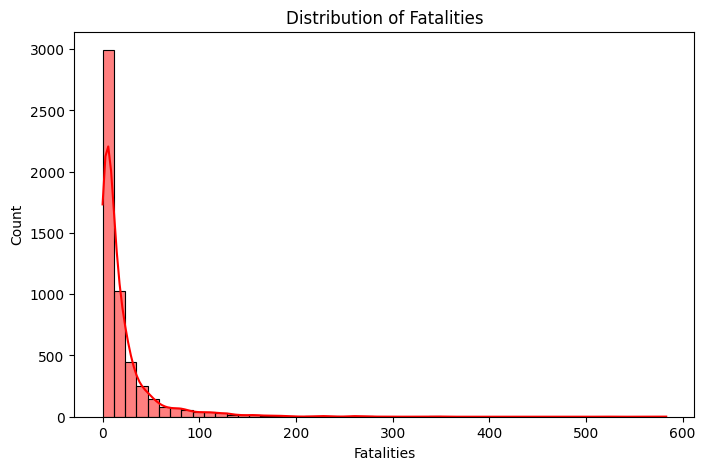

In [16]:
#Distribution of Fatalities
plt.figure(figsize=(8,5))
sns.histplot(df['Fatalities'], bins=50, kde=True, color='red')
plt.title("Distribution of Fatalities")
plt.xlabel("Fatalities")
plt.ylabel("Count")
plt.show()

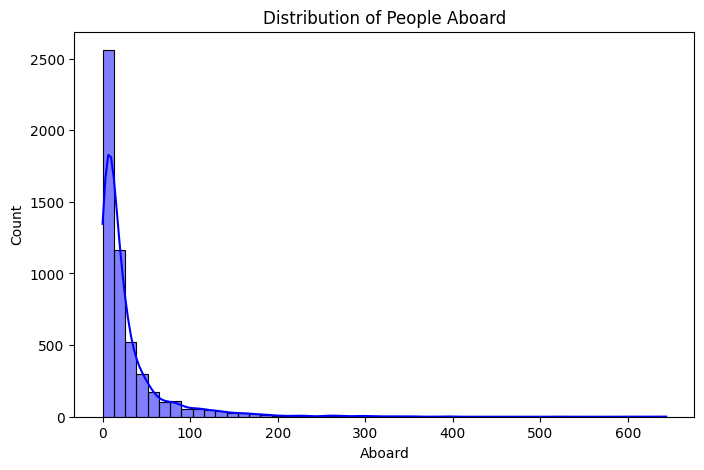

In [17]:
#Distribution of Aboard (People on Plane)
plt.figure(figsize=(8,5))
sns.histplot(df['Aboard'], bins=50, kde=True, color='blue')
plt.title("Distribution of People Aboard")
plt.xlabel("Aboard")
plt.ylabel("Count")
plt.show()

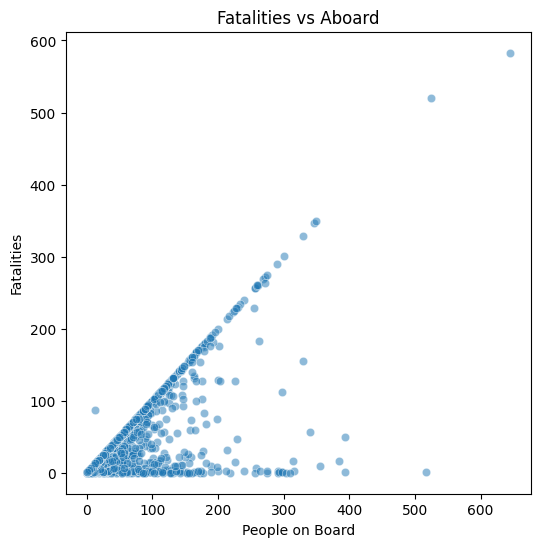

In [18]:
#Fatalities vs Aboard (Scatterplot)
plt.figure(figsize=(6,6))
sns.scatterplot(x='Aboard', y='Fatalities', data=df, alpha=0.5)
plt.title("Fatalities vs Aboard")
plt.xlabel("People on Board")
plt.ylabel("Fatalities")
plt.show()

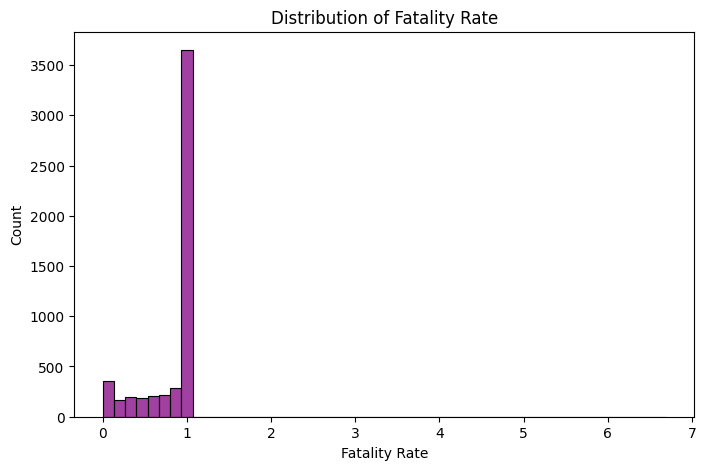

In [19]:
#Fatality Rate (Fatalities ÷ Aboard)
df['Fatality_Rate'] = df['Fatalities'] / df['Aboard']

plt.figure(figsize=(8,5))
sns.histplot(df['Fatality_Rate'], bins=50, color='purple')
plt.title("Distribution of Fatality Rate")
plt.xlabel("Fatality Rate")
plt.ylabel("Count")
plt.show()

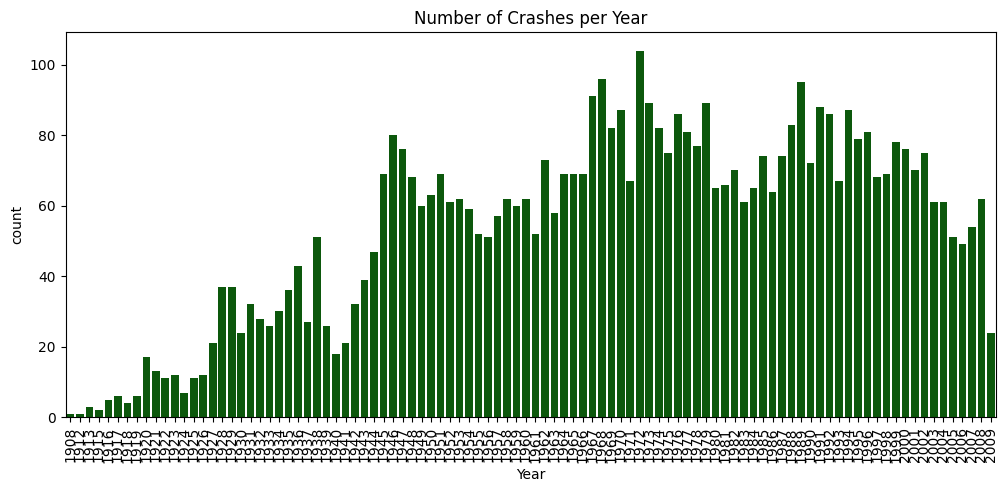

In [20]:
#Trend of Crashes per Year
df['Year'] = df['Date'].dt.year

plt.figure(figsize=(12,5))
sns.countplot(x='Year', data=df, color='darkgreen', order=sorted(df['Year'].dropna().unique()))
plt.xticks(rotation=90)
plt.title("Number of Crashes per Year")
plt.show()

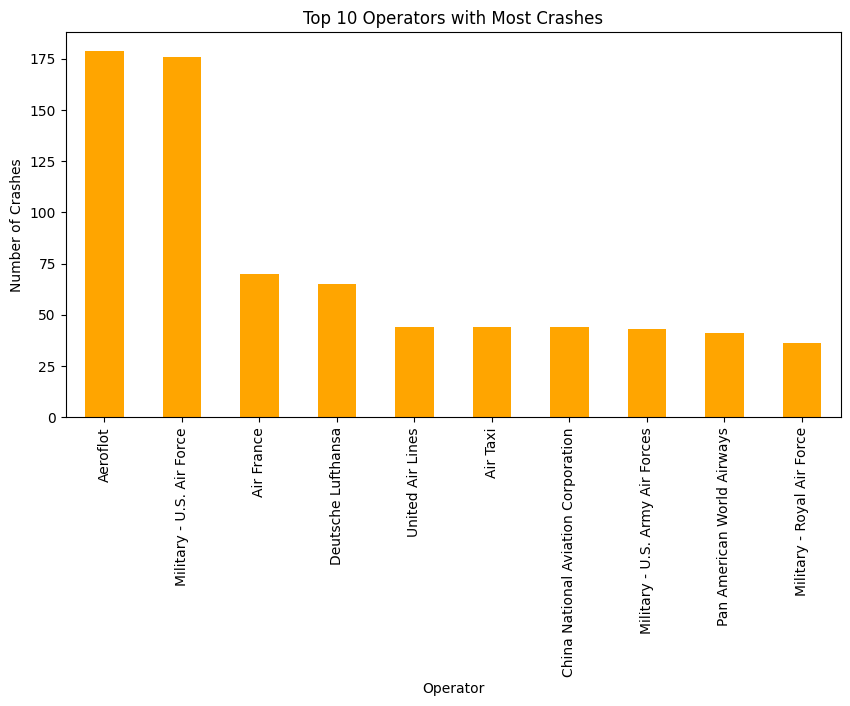

In [21]:
#Top 10 Operators with Most Crashes
plt.figure(figsize=(10,5))
df['Operator'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Operators with Most Crashes")
plt.xlabel("Operator")
plt.ylabel("Number of Crashes")
plt.show()

Feature Engineering

In [11]:
# Extract Hour safely from 'Time'
def extract_hour(time_str):
    try:
        hour = int(str(time_str).split(":")[0])
        return hour if 0 <= hour <= 23 else 0
    except:
        return 0

df['Hour'] = df['Time'].apply(extract_hour)
df['Month'] = df['Date'].dt.month.fillna(0).astype(int)
df['DayOfWeek'] = df['Date'].dt.dayofweek.fillna(0).astype(int)

# Fill missing numeric values
for col in ['Aboard','Fatalities','Hour','Month','DayOfWeek']:
    df[col] = df[col].fillna(df[col].median())

# Fill missing categorical values
for col in ['Operator','Type','Country']:
    df[col] = df[col].fillna('Unknown')

# Define target: HighFatality (1 if Fatalities >= 10 else 0)
df['HighFatality'] = (df['Fatalities'] >= 10).astype(int)

# Features & target
features = ['Hour','Month','DayOfWeek','Aboard','Operator','Type','Country']
X = df[features]
y = df['HighFatality']


Preprocessing & Train/Test Split

In [14]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Encode categorical variables & scale numeric
categorical_features = ['Operator','Type','Country']
numeric_features = ['Hour','Month','DayOfWeek','Aboard']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Preprocessing done. Train samples:", X_train.shape[0], "Test samples:", X_test.shape[0])


Preprocessing done. Train samples: 4214 Test samples: 1054


Train Logistic Regression
from

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Create pipeline: preprocessing + Logistic Regression
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model
logreg_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = logreg_pipeline.predict(X_test)

# Evaluate
print("--- Logistic Regression Classification Report ---")
print(classification_report(y_test, y_pred))

print("--- Logistic Regression Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

--- Logistic Regression Classification Report ---
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       539
           1       0.76      0.74      0.75       515

    accuracy                           0.76      1054
   macro avg       0.76      0.76      0.76      1054
weighted avg       0.76      0.76      0.76      1054

--- Logistic Regression Confusion Matrix ---
[[420 119]
 [135 380]]


Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create pipeline: preprocessing + Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate
print("--- Random Forest Classification Report ---")
print(classification_report(y_test, y_pred_rf))

print("--- Random Forest Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred_rf))

--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       0.96      0.82      0.89       539
           1       0.84      0.97      0.90       515

    accuracy                           0.89      1054
   macro avg       0.90      0.89      0.89      1054
weighted avg       0.90      0.89      0.89      1054

--- Random Forest Confusion Matrix ---
[[441  98]
 [ 16 499]]


Model Evaluation


--- Random Forest Confusion Matrix ---
[[441  98]
 [ 16 499]]


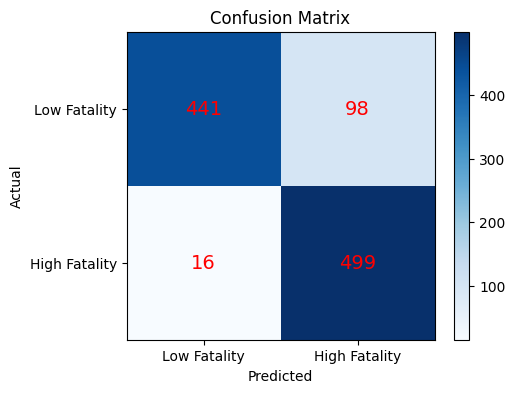


--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       0.96      0.82      0.89       539
           1       0.84      0.97      0.90       515

    accuracy                           0.89      1054
   macro avg       0.90      0.89      0.89      1054
weighted avg       0.90      0.89      0.89      1054



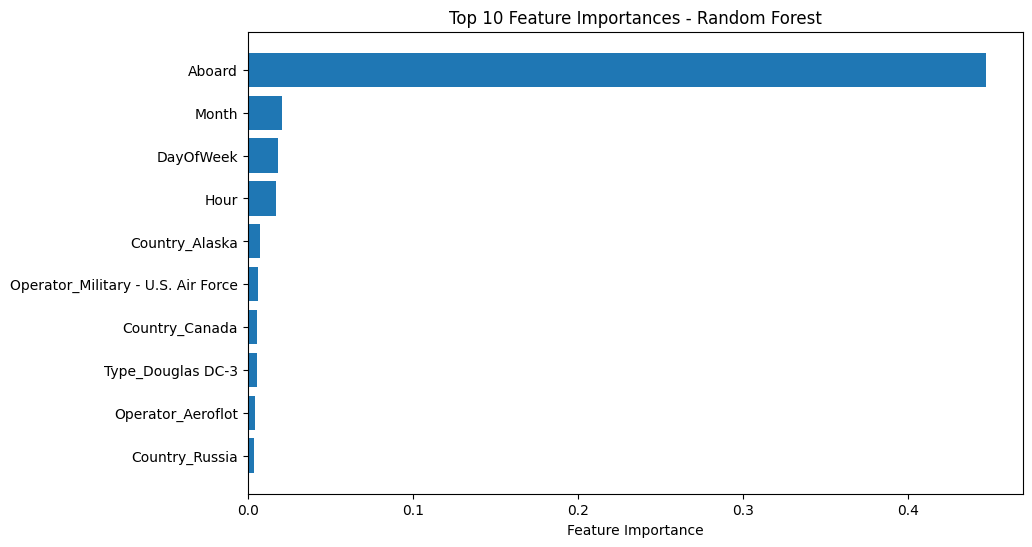

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred_rf)
print("--- Random Forest Confusion Matrix ---")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ['Low Fatality','High Fatality'])
plt.yticks([0,1], ['Low Fatality','High Fatality'])

# Add counts on the matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i,j], ha='center', va='center', color='red', fontsize=14)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# --- Classification Report ---
print("\n--- Random Forest Classification Report ---")
print(classification_report(y_test, y_pred_rf))

# --- Feature Importance ---
importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Get feature names after preprocessing
ohe_features = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = numeric_features + list(ohe_features)

# Plot top 10 important features
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [all_features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances - Random Forest')
plt.show()
